<a href="https://colab.research.google.com/github/Rakibul-Hassan32/Natural-Language-Processing/blob/main/nlp_using_neural_networks_and_deep_learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Embeddings for Natural Language Processing

Steps:
- Download the Data
- Prepare Data for Training
- Logistic Regression Model
- Feed Forward Nueral Network


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

## Download the Data



In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sub_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sub_fname = 'data/sample_submission.csv.zip'

 67% 37.0M/54.9M [00:00<00:00, 54.0MB/s]
100% 54.9M/54.9M [00:00<00:00, 70.9MB/s]
 32% 5.00M/15.8M [00:00<00:00, 27.3MB/s]
100% 15.8M/15.8M [00:00<00:00, 62.1MB/s]
100% 4.09M/4.09M [00:00<00:00, 30.4MB/s]
100% 4.09M/4.09M [00:00<00:00, 30.4MB/s]


In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
if IS_KAGGLE:
    sample_df = raw_df
else:
    sample_df = raw_df.sample(100_000, random_state=42)

## Prepare Data for Training


Steps:
- Convert text to TF-IDF Vectors
- Split training & validation set
- Convert to PyTorch tensors

### Conversion to TF-IDF Vectors

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language='english')

def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
tokenize("Ain't nothin' (but a heartache)!")

['ai', "n't", 'nothin', "'", '(', 'but', 'a', 'heartach', ')', '!']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 26.8 s, sys: 86.7 ms, total: 26.9 s
Wall time: 28.9 s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f87d6a1e4d0>)

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 27.2 s, sys: 47.9 ms, total: 27.2 s
Wall time: 27.5 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
targets = sample_df.target.values

In [ ]:
targets.shape

(100000,)

In [ ]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 42s, sys: 254 ms, total: 1min 42s
Wall time: 1min 50s


### Split training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [ ]:
train_inputs.shape, val_inputs.shape

((70000, 1000), (30000, 1000))

In [ ]:
train_targets.shape

(70000,)

### Convert to PyTorch Tensors

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [ ]:
train_tensors = F.normalize(torch.tensor(train_inputs.toarray()).float(), dim=0)
val_tensors = F.normalize(torch.tensor(val_inputs.toarray()).float(), dim=0)


In [ ]:
train_tensors.shape, val_tensors.shape

(torch.Size([70000, 1000]), torch.Size([30000, 1000]))

In [ ]:
train_ds = TensorDataset(train_tensors, torch.tensor(train_targets))
val_ds = TensorDataset(val_tensors, torch.tensor(val_targets))

In [ ]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [ ]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)
    print(targets_batch)
    break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


## Logistic Regression Model

In [ ]:
import torch.nn as nn

In [ ]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)

    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
logreg_model = LogReg()

In [ ]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)

    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()

    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0])
outputs tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
accuracy 0.9375
f1_score 0.0


In [ ]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)

        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs,
                                          targets.float(),
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [ ]:
logreg_model = LogReg()

In [ ]:
history = [evaluate(logreg_model, val_dl)]

In [ ]:
history

[(13.918355763212164, 0.08160460992907802, 0.11380562818090172)]

In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 4.3501; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 1; Loss: 4.0294; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 2; Loss: 3.7655; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 3; Loss: 3.5557; Accuracy: 0.9394; F1 Score: 0.0041
Epoch: 4; Loss: 3.3967; Accuracy: 0.9398; F1 Score: 0.0247


In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.2823; Accuracy: 0.9412; F1 Score: 0.0952
Epoch: 1; Loss: 3.1887; Accuracy: 0.9425; F1 Score: 0.1555
Epoch: 2; Loss: 3.1316; Accuracy: 0.9434; F1 Score: 0.2169
Epoch: 3; Loss: 3.0847; Accuracy: 0.9445; F1 Score: 0.2694
Epoch: 4; Loss: 3.0736; Accuracy: 0.9456; F1 Score: 0.3342


In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.0492; Accuracy: 0.9460; F1 Score: 0.3594
Epoch: 1; Loss: 3.0585; Accuracy: 0.9463; F1 Score: 0.3966
Epoch: 2; Loss: 3.0352; Accuracy: 0.9463; F1 Score: 0.4035
Epoch: 3; Loss: 3.0615; Accuracy: 0.9459; F1 Score: 0.4216
Epoch: 4; Loss: 3.1021; Accuracy: 0.9458; F1 Score: 0.4452


In [ ]:
losses = [item[0] for item in history]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

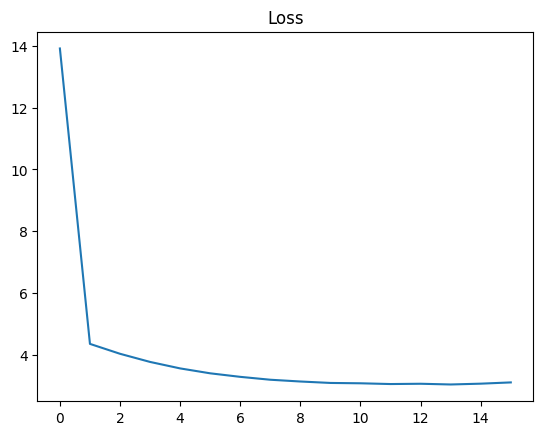

In [ ]:
plt.plot(losses);
plt.title('Loss')

In [ ]:
f1s = [item[2] for item in history]

Text(0.5, 1.0, 'F1 Score')

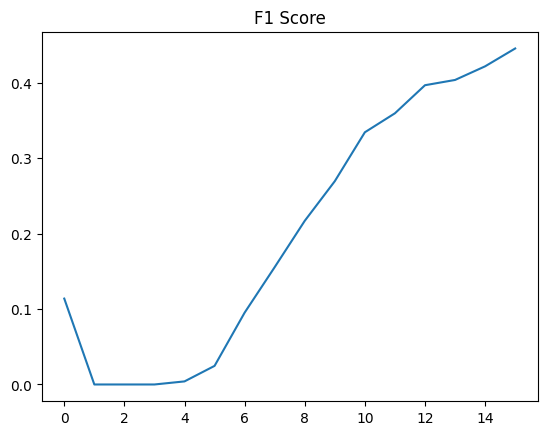

In [ ]:
plt.plot(f1s)
plt.title('F1 Score')

## Feed Forward Neural Network

In [ ]:
import torch.nn.functional as F

In [ ]:
class FeedForwardModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)

    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [ ]:
ff_model = FeedForwardModel()

In [ ]:
history = [evaluate(ff_model, val_dl)]

In [ ]:
history

[(14.651753717787722, 0.06073803191489362, 0.11375188015022653)]

In [ ]:
%%time
history += fit(5, 0.001, ff_model, train_dl, val_dl)

Epoch: 0; Loss: 3.3289; Accuracy: 0.9318; F1 Score: 0.4750
Epoch: 1; Loss: 3.4057; Accuracy: 0.9272; F1 Score: 0.4866
Epoch: 2; Loss: 3.2919; Accuracy: 0.9344; F1 Score: 0.4875
Epoch: 3; Loss: 3.2847; Accuracy: 0.9340; F1 Score: 0.4946
Epoch: 4; Loss: 3.6772; Accuracy: 0.9203; F1 Score: 0.4746
CPU times: user 2min 20s, sys: 265 ms, total: 2min 20s
Wall time: 2min 24s


## Make Predictions and Submit

In [ ]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [ ]:
test_ds = TensorDataset(test_tensors)

In [ ]:
test_dl = DataLoader(test_ds, batch_size)

In [ ]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [ ]:
test_preds = predict(ff_model, test_dl)

In [ ]:
test_preds[:20]

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds

In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,1
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,1
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,1
